In [1]:
import matplotlib.pyplot as plt
import numpy as np
from embedders import manifolds, gaussian_mixture, predictors
from sklearn.model_selection import train_test_split

In [24]:
pm = manifolds.ProductManifold(signature=[(1,3),(1,3),(-1,3),(-1,3),(0,3)])
X, y = gaussian_mixture.gaussian_mixture(pm, num_points=1000, seed=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pdt = predictors.tree_new.ProductSpaceDT(pm=pm, n_features="d_choose_2")
pdt.fit(X_train, y_train)

print(f"{pdt.score(X_test, y_test).float().mean().item():.4f}")

0.9950


In [26]:
first_split_dims = pdt.angle_dims[pdt.nodes[0].feature]
theta = pdt.nodes[0].theta

(-777.3634033203125, 2685.55712890625)

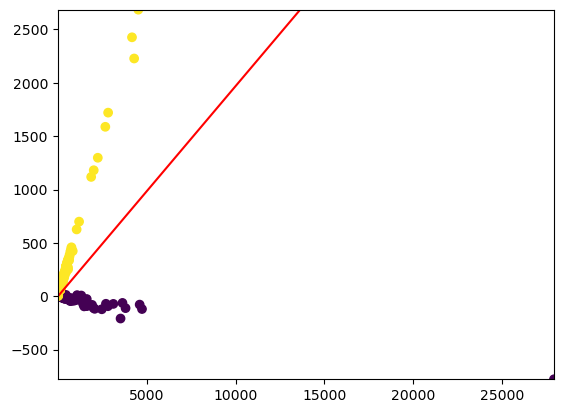

In [27]:
plt.scatter(X[:,first_split_dims[0]].numpy(), X[:,first_split_dims[1]].numpy(), c=y)

# plot decision boundary
c = np.cos(theta)
s = np.sin(theta)
plt.plot([-s*1e10, s*1e10], [-c*1e10, c*1e10], 'r-')

# put boundaries back
plt.xlim(X[:,first_split_dims[0]].min(), X[:,first_split_dims[0]].max())
plt.ylim(X[:,first_split_dims[1]].min(), X[:,first_split_dims[1]].max())


In [28]:
next_split_dims = pdt.angle_dims[pdt.nodes[1].feature]

TypeError: list indices must be integers or slices, not NoneType

In [29]:
pdt.nodes[1].__dict__

{'value': 0,
 'probs': tensor([1., 0.]),
 'feature': None,
 'theta': None,
 'left': None,
 'right': None}